### **Introduction**
In this project, we aim to build a robust hate speech detection system using machine learning and deep learning techniques. With the exponential growth of social media platforms, hate speech has become a significant concern due to its adverse social and psychological impacts. This project focuses on analyzing, preprocessing, and classifying textual data into two categories: Hate Speech and Non-Hate Speech.

#### **What is your topic?**
The topic of this project is Hate Speech Detection. This project focuses on identifying hateful
text from social media platforms using Natural Language Processing (NLP) techniques and machine
learning models.
#### **What is the main motivation for your work?**
The main motivation for this project stems from the growing prevalence of hate speech on social
media. Social media text often contains hateful content disguised with emoticons, slang, or modern
trends, making it challenging to detect automatically. This dataset is designed to train machine
learning models to identify hate speech effectively. It reflects current social media trends and aids in
developing automated systems to filter out such content. The dataset is neutralized, preprocessed,
and composed of text sentences categorized as hateful (”1”) or non-hateful (”0”). This work
provides a benchmark dataset for hate speech detection, helping practitioners in Deep Learning
(DL) and NLP while maintaining compliance with policy guidelines to mitigate cyber harm.


### **Project Workflow**
In this project, we are focusing on the following key steps:

1. **Dataset Curation and Preprocessing**

2. **Data Exploration and Summary Statistics**

3. **ML Algorithm Design/Development**:
    - **DistilBERT**
    - **LSTM**
    - **Naive Bayes**

4. **ML Algorithm Training and Test Data Analysis**

5. **Visualization, Result Analysis, Conclusion**.


Installing the Required Libraries

In [2]:
!pip install nltk vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.3 MB/s eta 0:00:00


In [23]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=f534e5aef4c68e8d7cb0c03a6862063d6e6fa4d4401b5b4f2c3d4370bfc68653
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [55]:
!pip install transformers

#### Importing the required libraries

In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from collections import Counter

In [5]:
df = pd.read_csv("HateSpeechDatasetBalanced.csv")

In [6]:
df.shape

(726119, 2)

In [19]:
df.head(5)

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


### 1. **Dataset Curation and Preprocessing**:
Preparing and cleaning the dataset to ensure it is suitable for analysis and machine learning tasks.

In [20]:
#removing the Punctuations
import string
punctuation = string.punctuation.replace(',', '')
df['Content'] = df['Content'].apply(lambda text: text.translate(str.maketrans('', '', punctuation + ',')))

print(df.head())


                                             Content  Label
0  denial of normal the con be asked to comment o...      1
1  just by being able to tweet this insufferable ...      1
2  that is retarded you too cute to be single tha...      1
3  thought of a real badass mongol style declarat...      1
4                                afro american basho      1


In [21]:
#removing the duplicates
df = df.drop_duplicates(subset=['Content'])
df.reset_index(drop=True, inplace=True)
print(df)


                                                  Content  Label
0       denial of normal the con be asked to comment o...      1
1       just by being able to tweet this insufferable ...      1
2       that is retarded you too cute to be single tha...      1
3       thought of a real badass mongol style declarat...      1
4                                     afro american basho      1
...                                                   ...    ...
699982  i mute this telecasting and played kanye west ...      1
699983  but hell yeah he s not a bachelor but looooooo...      1
699984  great video musician but s not my musician lol...      1
699985  not great pop video yeah he s not a pedophile ...      1
699986  great video yeah he s non a paedophile lolllll...      1

[699987 rows x 2 columns]


In [22]:
# after removing the duplicate values shape of the dataset
df.shape

(699987, 2)

In [24]:
# Only keeps alphabetic characters and spaces
def preprocess_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.strip()  # Remove leading/trailing whitespace
    return text

# Apply the enhanced preprocessing to the 'content' column and replace the original 'content' column
df['Content'] = df['Content'].apply(preprocess_text)

# Display the DataFrame after cleaning the 'content' column
df.head(10)

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1
5,yeah retard haha,1
6,the ching chong chung stuff,1
7,the dead what a slut still warm when she tweet...,1
8,let your tweets be harmless it will not affect...,1
9,these latinos who have a problem with immigrat...,1


In [25]:
#Keeping only english sentences and removing other language sentences
#landetect will only keep the english sentences and check will done for sentences above 3 words.
from langdetect import detect, DetectorFactory

# Ensure consistent results from langdetect
DetectorFactory.seed = 0

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Apply the function to filter the DataFrame
df = df[df['Content'].apply(is_english)]

# Display the filtered DataFrame
print(df)

                                                  Content  Label
0       denial of normal the con be asked to comment o...      1
1       just by being able to tweet this insufferable ...      1
2       that is retarded you too cute to be single tha...      1
3       thought of a real badass mongol style declarat...      1
4                                     afro american basho      1
...                                                   ...    ...
699982  i mute this telecasting and played kanye west ...      1
699983  but hell yeah he s not a bachelor but looooooo...      1
699984  great video musician but s not my musician lol...      1
699985  not great pop video yeah he s not a pedophile ...      1
699986  great video yeah he s non a paedophile lolllll...      1

[656368 rows x 2 columns]


In [26]:
#Saving the data as "only_english2"
df.to_csv('D:\hate_english\only_english2.csv', index=False)

In [27]:
#Opening the new dataset in df2
df2 = pd.read_csv("only_english2.csv")
df2

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1
...,...,...
656329,i mute this telecasting and played kanye west ...,1
656330,but hell yeah he s not a bachelor but looooooo...,1
656331,great video musician but s not my musician lol...,1
656332,not great pop video yeah he s not a pedophile ...,1


In [28]:
null_counts = df2.isnull().sum() # Checking for Null values
print(null_counts)

Content    0
Label      0
dtype: int64


### Data Visualization

### Label Distribution

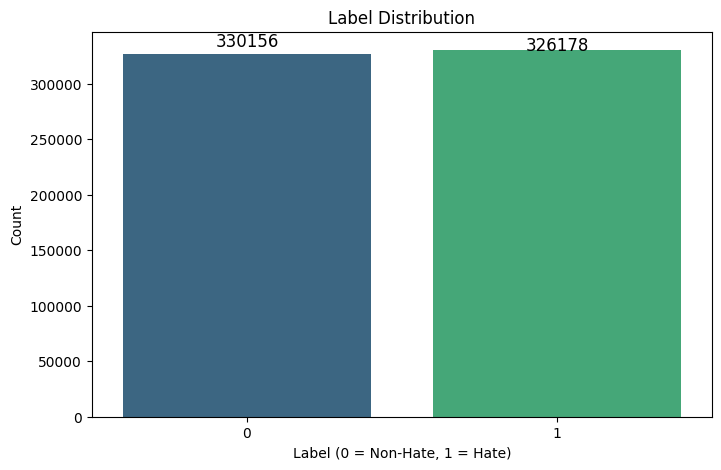

In [42]:
# 1. Label Distribution
label_counts = df2['Label'].value_counts()
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis", hue=label_counts.index, dodge=False)
plt.legend([], [], frameon=False)  # Disable legend as it's redundant
plt.title("Label Distribution")
plt.xlabel("Label (0 = Non-Hate, 1 = Hate)")
plt.ylabel("Count")

# Add numbers above the bars
for index, value in enumerate(label_counts.values):
    plt.text(index, value + max(label_counts.values) * 0.01, str(value), ha='center', fontsize=12)

plt.show()


### Text Length Distribution


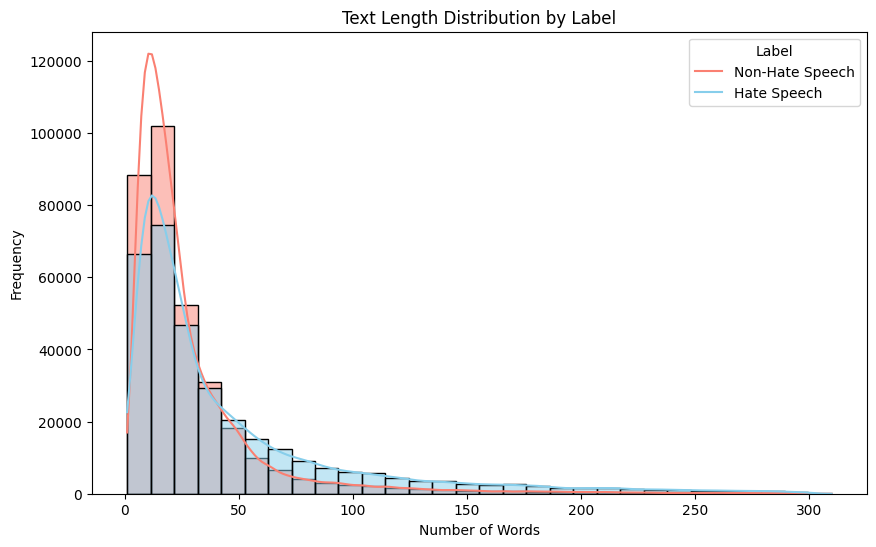

In [43]:
df2['Text Length'] = df2['Content'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Text Length', hue='Label', kde=True, bins=30, palette={0: "skyblue", 1: "salmon"})
plt.title("Text Length Distribution by Label")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend(["Non-Hate Speech", "Hate Speech"], title="Label")
plt.show()

### CDF Plot for Text Lengths

### CDF Plot for Text Lengths


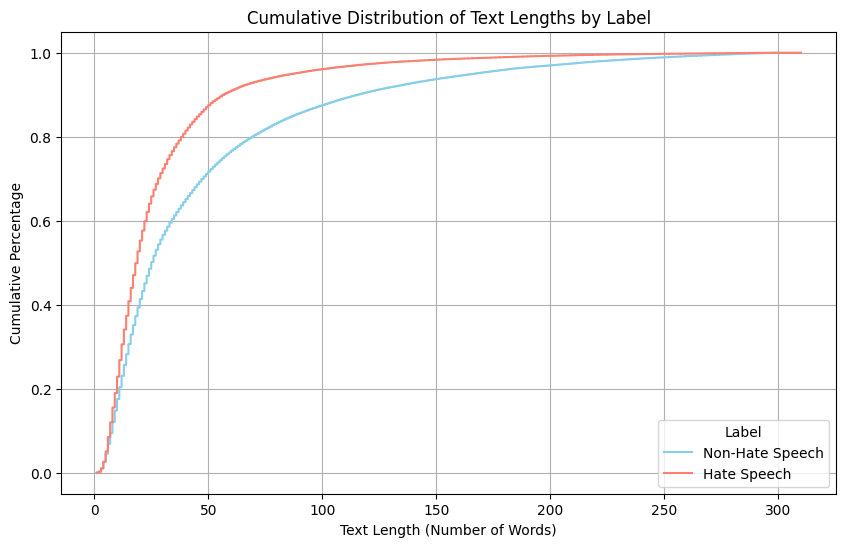

In [49]:
plt.figure(figsize=(10, 6))

# Calculate CDF for Non-Hate Speech
non_hate_lengths = sorted(df2[df2['Label'] == 0]['Text Length'])
non_hate_cdf = [i / len(non_hate_lengths) for i in range(len(non_hate_lengths))]
plt.plot(non_hate_lengths, non_hate_cdf, label="Non-Hate Speech", color="skyblue")

# Calculate CDF for Hate Speech
hate_lengths = sorted(df2[df2['Label'] == 1]['Text Length'])
hate_cdf = [i / len(hate_lengths) for i in range(len(hate_lengths))]
plt.plot(hate_lengths, hate_cdf, label="Hate Speech", color="salmon")

# Plot details
plt.title("Cumulative Distribution of Text Lengths by Label")
plt.xlabel("Text Length (Number of Words)")
plt.ylabel("Cumulative Percentage")
plt.legend(title="Label")
plt.grid()
plt.show()


# **Data Exploration and Summary Statistics**  
Analyzing the dataset to uncover patterns, distributions, and insights that guide the model development process.


*   Hypothesis Testing
*   Chi-Square Test
*   Distribution Anakysis





**Hypothesis Testing**

Null Hypothesis (H₀): There is no significant difference in the mean sentiment scores between hate speech and non-hate speech sentences.

Alternative Hypothesis (H₁): There is a significant difference in the mean sentiment scores between hate speech and non-hate speech sentences.

In [50]:
# We can do random samplying to take a sample data
analyzer = SentimentIntensityAnalyzer()
sample_size = int(len(df2) * 0.01)  # Adjust the percentage as needed
sample_df = df2.sample(n=sample_size, random_state=1)  # Set random_state for reproducibility

# Function to calculate sentiment scores
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# Apply sentiment analysis to the 'Content' column of the sampled DataFrame
sample_df['sentiment'] = sample_df['Content'].apply(get_sentiment)

# Separate the data into hate speech and non-hate speech
hate_speech = sample_df[sample_df['Label'] == 1]['sentiment']
non_hate_speech = sample_df[sample_df['Label'] == 0]['sentiment']

# Perform a t-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(hate_speech, non_hate_speech)

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Hate speech has a significantly different sentiment score.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sentiment scores.")

T-statistic: -16.096086757077888
P-value: 3.3494349275982906e-57
Reject the null hypothesis: Hate speech has a significantly different sentiment score.


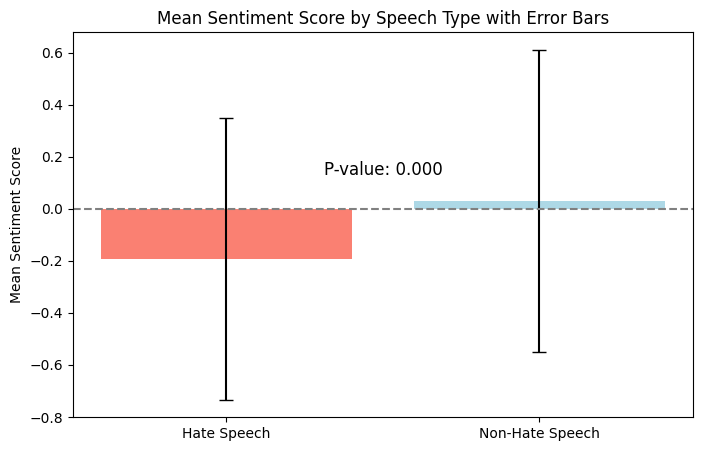

In [52]:
mean_hate = hate_speech.mean()
mean_non_hate = non_hate_speech.mean()
std_hate = hate_speech.std()
std_non_hate = non_hate_speech.std()

# Prepare data for plotting
labels = ['Hate Speech', 'Non-Hate Speech']
means = [mean_hate, mean_non_hate]
std_devs = [std_hate, std_non_hate]

# Create bar plot with error bars
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, means, yerr=std_devs, capsize=5, color=['salmon', 'lightblue'])
plt.title('Mean Sentiment Score by Speech Type with Error Bars')
plt.ylabel('Mean Sentiment Score')
plt.axhline(0, color='gray', linestyle='--')  # Line at 0 for reference

# Add the p-value as text on the plot
plt.text(0.5, max(means) + 0.1, f'P-value: {p_value:.3f}', ha='center', fontsize=12)

# Show the plot
plt.show()

**Conclusion from the above Graph**
The plot illustrates a significant distinction between sentiment scores, with non-hate speech displaying a positive mean sentiment, while hate speech is associated with a negative mean sentiment.

**Chi-Square test :**

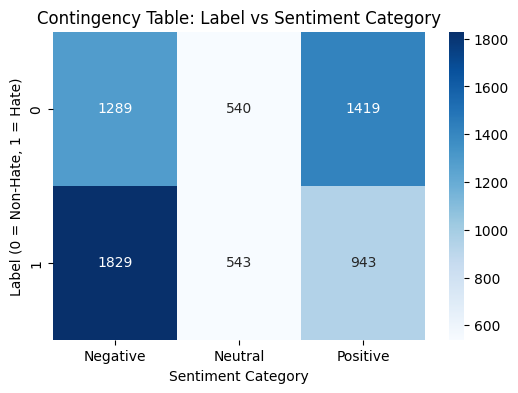

Chi-Square Statistic: 188.79097478747784
P-Value: 1.010556752441172e-41


In [53]:
# Categorize sentiment into positive, negative, and neutral
sample_df['sentiment_category'] = pd.cut(sample_df['sentiment'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])

# Create a contingency table
contingency_table = pd.crosstab(sample_df['Label'], sample_df['sentiment_category'])

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Plotting the contingency table
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Contingency Table: Label vs Sentiment Category')
plt.ylabel('Label (0 = Non-Hate, 1 = Hate)')
plt.xlabel('Sentiment Category')
plt.show()

# Print Chi-Square test results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")

**Conclusion from the above Graph**:Hate speech appears more often in negative sentiment, while neutral sentiment shows an almost equal distribution between hate and non-hate speech. Non-hate speech dominates in positive sentiment.

**Distribution Analysis**

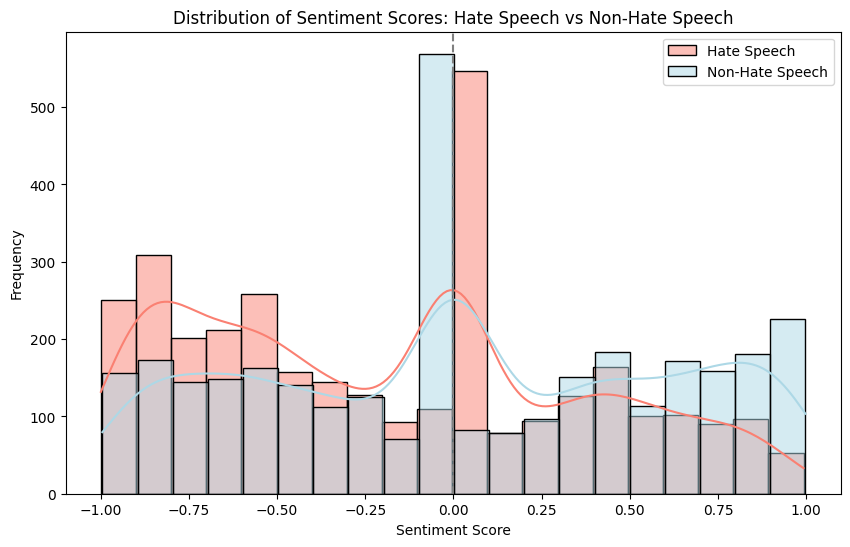

In [54]:
#Distribution Analysis
# Plot Histogram and KDE for Sentiment Scores (hate speech vs non-hate speech)
plt.figure(figsize=(10, 6))

# Plotting the distribution of sentiment scores for both categories
sns.histplot(hate_speech, kde=True, color='salmon', label='Hate Speech', bins=20)
sns.histplot(non_hate_speech, kde=True, color='lightblue', label='Non-Hate Speech', bins=20)

# Adding titles and labels
plt.title('Distribution of Sentiment Scores: Hate Speech vs Non-Hate Speech')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.axvline(0, color='gray', linestyle='--')  # Reference line at 0 sentiment score

plt.show()

**From the above plot we can analyse :**
1) Hate speech is more concentrated in negative sentiment scores, as shown by the higher frequency on the left side of the sentiment scale.<br>
2) Non-hate speech tends to have more positive sentiment scores, with a noticeable peak around the neutral and positive range.

#**ML Algorithm Design/Development**:  


*   **DistilBERT**: Utilizing a pre-trained transformer model for effective contextual understanding of textual data.
*   **LSTM**: Employing a Long Short-Term Memory model to capture sequential dependencies in text.
*   **Naive Bayes**: Leveraging a probabilistic algorithm for a baseline comparison in text classification.


### DistilBERT Model

In [ ]:
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# 1. Load the dataset
df2 = pd.read_csv(r"only_english2.csv")

# Basic data checks
print(df2.head())
print(df2.isnull().sum())
assert 'Content' in df2.columns, "Missing 'Content' column"
assert 'Label' in df2.columns, "Missing 'Label' column"

# 2. Split the data
texts = df2['Content'].tolist()
labels = df2['Label'].tolist()

train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Training samples: {len(train_texts)}")
print(f"Testing samples: {len(test_texts)}")

# 3. Tokenize the data
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

encoded_train = tokenizer(
    train_texts,
    padding=True,
    truncation=True,
    max_length=64,
    return_tensors="pt"
)

encoded_test = tokenizer(
    test_texts,
    padding=True,
    truncation=True,
    max_length=64,
    return_tensors="pt"
)

                                             Content  Label
0  denial of normal the con be asked to comment o...      1
1  just by being able to tweet this insufferable ...      1
2  that is retarded you too cute to be single tha...      1
3  thought of a real badass mongol style declarat...      1
4                                afro american basho      1
Content    0
Label      0
dtype: int64
Training samples: 525067
Testing samples: 131267


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Data Loader

In [ ]:
# 4. Create datasets and dataloaders
train_labels_tensor = torch.tensor(train_labels)
test_labels_tensor = torch.tensor(test_labels)

train_dataset = TensorDataset(
    encoded_train['input_ids'],
    encoded_train['attention_mask'],
    train_labels_tensor
)

test_dataset = TensorDataset(
    encoded_test['input_ids'],
    encoded_test['attention_mask'],
    test_labels_tensor
)

batch_size = 16

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)

# 5. Set up the model and optimizer
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2
)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
print(f"Using device: {device}")

optimizer = AdamW(model.parameters(), lr=1e-5)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cuda


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


**Training the Model**

Epoch 1/3, Average Loss: 0.2960
Epoch 2/3, Average Loss: 0.1962
Epoch 3/3, Average Loss: 0.1351


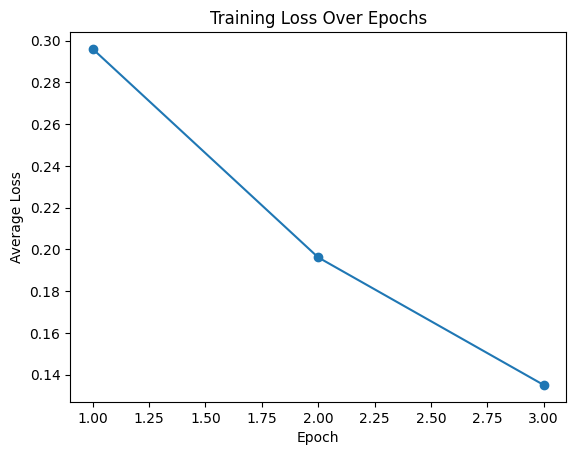

In [ ]:
# 6. Training loop
num_epochs = 3
losses = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_dataloader:
        batch_input_ids, batch_attention_mask, batch_labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(
            input_ids=batch_input_ids,
            attention_mask=batch_attention_mask,
            labels=batch_labels
        )
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_dataloader)
    losses.append(avg_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

# Plot training loss
plt.plot(range(1, num_epochs + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss Over Epochs')
plt.show()

In [ ]:
# 7. Evaluation
model.eval()

true_labels = []
predictions = []

with torch.no_grad():
    for batch in test_dataloader:
        batch_input_ids, batch_attention_mask, batch_labels = [b.to(device) for b in batch]

        outputs = model(
            input_ids=batch_input_ids,
            attention_mask=batch_attention_mask
        )

        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        label_ids = batch_labels.cpu().numpy()

        predictions.extend(preds)
        true_labels.extend(label_ids)

# Calculate metrics
accuracy = accuracy_score(true_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(
    true_labels, predictions, average='binary'
)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# 8. Save the model and tokenizer
save_directory = "E:/hate_english/trained_distilbert_model"
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

print("Training complete! Model and tokenizer saved.")

Test Accuracy: 0.9118
Test Precision: 0.9126
Test Recall: 0.9120
Test F1 Score: 0.9123
Training complete! Model and tokenizer saved.


Testing the Model

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

# Load the trained model and tokenizer
model_directory = "/content/E:/hate_english/trained_distilbert_model"
tokenizer = DistilBertTokenizer.from_pretrained(model_directory)
model = DistilBertForSequenceClassification.from_pretrained(model_directory)

# Set the device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Function to classify a single sentence
def classify_sentence(sentence):
    # Tokenize the input sentence
    encoded_input = tokenizer(
        sentence,
        padding=True,
        truncation=True,
        max_length=64,
        return_tensors="pt"
    )

    # Move tensors to the correct device
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)

    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(input_ids=input_ids, attention_mask=attention_mask)

    # Get the logits and predicted label
    logits = output.logits
    predicted_label = torch.argmax(logits, dim=1).item()

    # Map the label to the class name
    label_map = {0: "Non-Hate Speech", 1: "Hate Speech"}
    return label_map[predicted_label]

# Test the function with a sample sentence
sentence = "fuck you"
result = classify_sentence(sentence)
print(f"Sentence: {sentence}")
print(f"Classification: {result}")

Sentence: fuck you
Classification: Hate Speech


### Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[59467  5769]
 [ 5810 60221]]


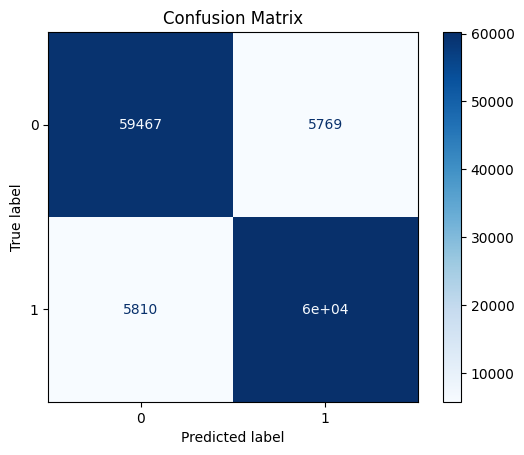

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming true_labels and predictions are populated during the evaluation phase

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Display the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix
cm_display.plot(cmap='Blues')

# Show the plot
plt.title('Confusion Matrix')
plt.show()


#### AUROC Curve(DistilBERT)

Test AUROC: 0.9734


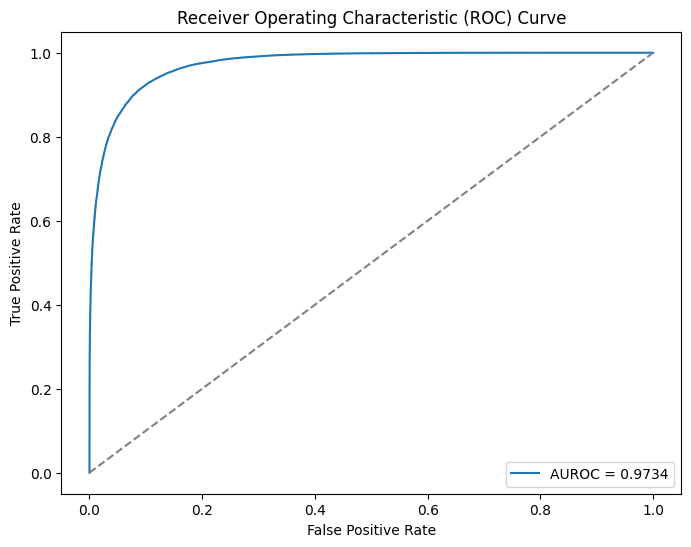

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# After evaluation, compute the AUROC curve

probabilities = []  # For AUROC
true_labels = []  # True labels from the test set
predictions = []  # Predicted labels from the model

with torch.no_grad():
    for batch in test_dataloader:
        batch_input_ids, batch_attention_mask, batch_labels = [b.to(device) for b in batch]

        outputs = model(
            input_ids=batch_input_ids,
            attention_mask=batch_attention_mask
        )

        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        label_ids = batch_labels.cpu().numpy()

        # Get predicted probabilities for the positive class (class 1)
        prob = torch.nn.functional.softmax(logits, dim=-1)[:, 1].cpu().numpy()

        predictions.extend(preds)
        true_labels.extend(label_ids)
        probabilities.extend(prob)

# Calculate AUROC
roc_auc = roc_auc_score(true_labels, probabilities)
print(f"Test AUROC: {roc_auc:.4f}")  # Print AUROC score

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(true_labels, probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUROC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### **LSTM Model**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load the dataset
file_path = '/content/only_english2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Preparing the data
X = data['Content']
y = data['Label']

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

X_seq = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_seq, maxlen=100, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42, stratify=y)

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate classification report
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
13127/13127 ━━━━━━━━━━━━━━━━━━━━ 177s 13ms/step - accuracy: 0.6301 - loss: 0.5920 - val_accuracy: 0.8311 - val_loss: 0.3688
Epoch 2/5
13127/13127 ━━━━━━━━━━━━━━━━━━━━ 196s 13ms/step - accuracy: 0.8442 - loss: 0.3457 - val_accuracy: 0.8485 - val_loss: 0.3344
Epoch 3/5
13127/13127 ━━━━━━━━━━━━━━━━━━━━ 201s 13ms/step - accuracy: 0.8658 - loss: 0.3005 - val_accuracy: 0.8546 - val_loss: 0.3202
Epoch 4/5
13127/13127 ━━━━━━━━━━━━━━━━━━━━ 203s 13ms/step - accuracy: 0.8834 - loss: 0.2671 - val_accuracy: 0.8575 - val_loss: 0.3184
Epoch 5/5
13127/13127 ━━━━━━━━━━━━━━━━━━━━ 199s 13ms/step - accuracy: 0.8979 - loss: 0.2386 - val_accuracy: 0.8612 - val_loss: 0.3174
4103/4103 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8591 - loss: 0.3189
4103/4103 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step
Accuracy: 0.8607
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     65236
           1       0.86      0.87      0.86     66031

    

#### Testing

In [5]:
# Function to preprocess and predict on user input
def predict_hate_speech(sentence, tokenizer, model):
    # Preprocess the input sentence
    seq = tokenizer.texts_to_sequences([sentence])
    padded_seq = pad_sequences(seq, maxlen=100, padding='post', truncating='post')

    # Predict the label
    prediction = model.predict(padded_seq)
    label = "Hate Speech" if prediction > 0.5 else "Non-Hate Speech"

    return label

# Example usage
while True:
    user_input = input("Enter a sentence (or type 'exit' to quit):")
    if user_input.lower() == "exit":
        break
    result = predict_hate_speech(user_input, tokenizer, model)
    print(f"Prediction: {result}")


Enter a sentence (or type 'exit' to quit):People from that group are worthless and should be excluded from society.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction: Hate Speech
Enter a sentence (or type 'exit' to quit):I disagree with the group's opinion, but I respect their right to express it.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: Non-Hate Speech
Enter a sentence (or type 'exit' to quit):exit


### **Naive Bayes Model**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = '/content/only_english2.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Splitting features (X) and labels (y)
X = data['Content']
y = data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.7796
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76     65236
           1       0.75      0.85      0.80     66031

    accuracy                           0.78    131267
   macro avg       0.79      0.78      0.78    131267
weighted avg       0.79      0.78      0.78    131267



Testing

In [10]:
import random
import pandas as pd

# Function to preprocess and predict using the Naive Bayes model
def predict_hate_speech(sentence, vectorizer, model):
    # Preprocess the input sentence using the TF-IDF vectorizer
    vectorized_sentence = vectorizer.transform([sentence])
    prediction = model.predict(vectorized_sentence)
    label = "Hate Speech" if prediction[0] == 1 else "Non-Hate Speech"
    return label

# Main interactive program
while True:
    # Randomly select three options from the dataset
    options = data.sample(3)['Content'].tolist()

    print("Choose a sentence to analyze:")
    for i, option in enumerate(options, start=1):
        print(f"{i}. {option}")
    print("4. Exit")

    # Get user input
    choice = input("Enter your choice (1-4): ").strip()

    if choice == '4':
        print("Exiting the program.")
        break

    if choice in ['1', '2', '3']:
        selected_sentence = options[int(choice) - 1]
        result = predict_hate_speech(selected_sentence, vectorizer, model)
        print(f"Prediction: {result}")
    else:
        print("Invalid choice. Please enter a number between 1 and 4.")


Choose a sentence to analyze:
1. black white people will also always own black native people
2. also a time since i went out meet this black girl through an app i did not realize i had stepped in a black area surrounded by angry ass black dudes who did not like white men in their area when i what a slut going to meet this girl but then here this go with the anarchists with that white mentality also there there some fucked up shit out there and to think this is going on in the u s in portland and seattle imagine old people getting attacked just walking around or getting robbed in those times for being white it is like something out of the third world glad you are all young and still a piece man
3. white whites are more in stock than blacks
4. Exit
Enter your choice (1-4): 1
Prediction: Hate Speech
Choose a sentence to analyze:
1. how unfortunate that no one cares what you think i am not sexist but football am not meant for women
2. ok now that getting good looks was just a surprise comi

Plotting the precision, Recall and F1-Score

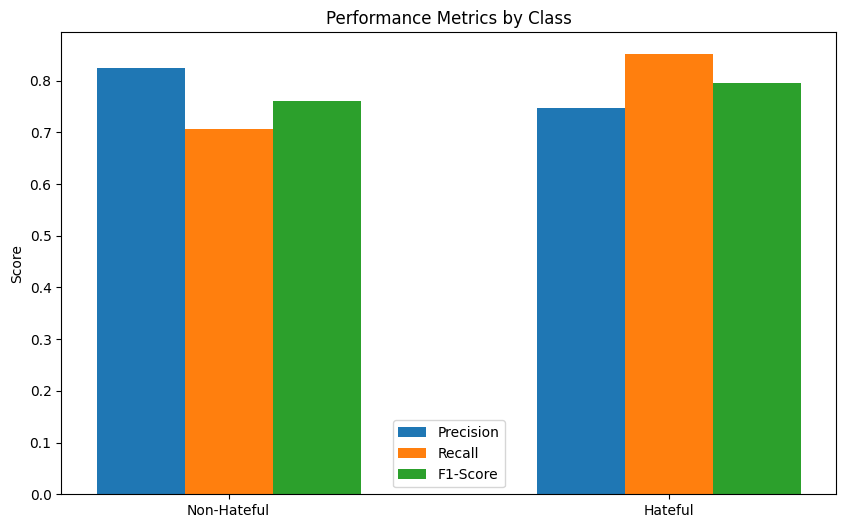

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract metrics for visualization
from sklearn.metrics import precision_recall_fscore_support

metrics = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])
precision, recall, f1_score = metrics[0], metrics[1], metrics[2]

# Plot Precision, Recall, and F1-score for each class
categories = ['Non-Hateful', 'Hateful']
x = range(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar([p + 0.2 for p in x], recall, width=0.2, label='Recall', align='center')
plt.bar([p + 0.4 for p in x], f1_score, width=0.2, label='F1-Score', align='center')

plt.xticks([p + 0.2 for p in x], categories)
plt.title('Performance Metrics by Class')
plt.ylabel('Score')
plt.legend()
plt.show()


#### **Comparing the Model Performances**

Model Performance Comparison:

         Model  Accuracy  Precision  Recall  F1-Score
0  Naive Bayes    0.7796     0.7900   0.780    0.7800
1         LSTM    0.8607     0.8600   0.860    0.8600
2   DistilBERT    0.9118     0.9126   0.912    0.9123


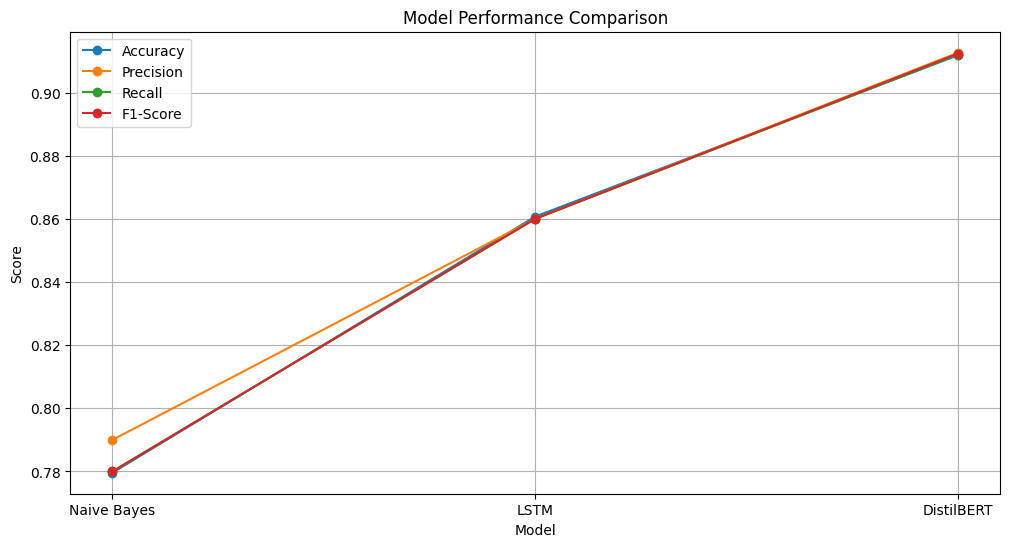


Best Model:
Model        DistilBERT
Accuracy         0.9118
Precision        0.9126
Recall            0.912
F1-Score         0.9123
Name: 2, dtype: object

Reason:
The DistilBERT model is the best because it achieves the highest F1-Score (0.9123), which balances precision (0.9126) and recall (0.9120) effectively.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Function to gather outputs from the previous models

def get_previous_outputs():
    # Assuming previous outputs are stored as dictionaries or similar structures
    naive_bayes_metrics = {
        "Model": "Naive Bayes",
        "Accuracy": 0.7796,
        "Precision": 0.79,
        "Recall": 0.78,
        "F1-Score": 0.78
    }

    lstm_metrics = {
        "Model": "LSTM",
        "Accuracy": 0.8607,
        "Precision": 0.86,
        "Recall": 0.86,
        "F1-Score": 0.86
    }

    distilbert_metrics = {
        "Model": "DistilBERT",
        "Accuracy": 0.9118,
        "Precision": 0.9126,
        "Recall": 0.9120,
        "F1-Score": 0.9123
    }

    # Collect metrics into a list of dictionaries
    return [naive_bayes_metrics, lstm_metrics, distilbert_metrics]

# Function to take input data from previous outputs
def compare_models():
    # Fetch data from previous outputs
    previous_outputs = get_previous_outputs()

    # Create a DataFrame from the output data
    results_df = pd.DataFrame(previous_outputs)

    # Display the DataFrame
    print("Model Performance Comparison:\n")
    print(results_df)

    # Visualization of model performance
    plt.figure(figsize=(12, 6))
    for metric in ["Accuracy", "Precision", "Recall", "F1-Score"]:
        plt.plot(results_df["Model"], results_df[metric], marker="o", label=metric)

    plt.title("Model Performance Comparison")
    plt.xlabel("Model")
    plt.ylabel("Score")
    plt.legend()
    plt.grid()
    plt.show()

    # Identifying the best model based on F1-Score
    best_model = results_df.loc[results_df["F1-Score"].idxmax()]
    print("\nBest Model:")
    print(best_model)

    # Reason for being the best
    print("\nReason:")
    print(f"The {best_model['Model']} model is the best because it achieves the highest F1-Score ({best_model['F1-Score']:.4f}), which balances precision ({best_model['Precision']:.4f}) and recall ({best_model['Recall']:.4f}) effectively.")

# Run the comparison
compare_models()


#### **Conclusion**
In this project, we developed a robust hate speech detection system using state-of-the-art machine learning and deep learning techniques. Among the models evaluated, including DistilBERT, LSTM, and Naive Bayes, DistilBERT emerged as the best-performing model, achieving an impressive F1-Score of 0.9123 and an overall accuracy of 91.18%. These results highlight DistilBERT’s ability to balance precision (0.9126) and recall (0.9120) effectively, demonstrating its suitability for handling diverse and challenging textual data.

The project emphasized the critical role of preprocessing and exploratory data analysis in preparing datasets for machine learning tasks. By employing steps such as language filtering, tokenization, and addressing data imbalances, we ensured the dataset was clean and reliable, which directly contributed to the success of the models. Insights from Exploratory Data Analysis (EDA) guided the selection of machine learning techniques, ensuring that each method was aligned with the characteristics of the data.

In conclusion, this project successfully demonstrated the potential of machine learning in addressing societal challenges like hate speech detection. By combining rigorous preprocessing, advanced NLP techniques, and detailed performance analysis, we created a framework that not only achieves accurate classification with 91.18% accuracy. This work contributes to the broader goal of creating safer and more inclusive digital environments.






